In [1]:
# Import modules
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
%matplotlib inline
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [28]:
#1. Global Earthquakes
df = pd.read_csv('usgs_earthquakes.csv')
#选取震级最大的50次地震
top_50_earthquakes = df.nlargest(50, 'mag')

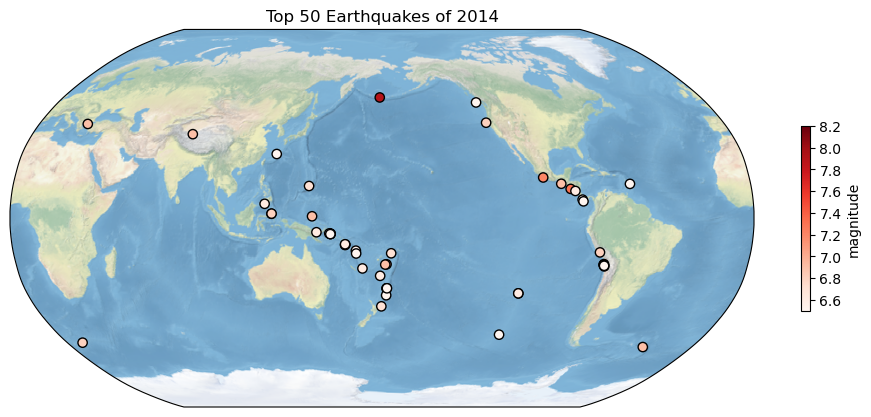

In [3]:
# 创建图形和轴对象，使用PlateCarree投影
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson(central_longitude=-180))

# 添加地理特征
ax.add_feature(cfeature.LAND,color='lightyellow')
ax.add_feature(cfeature.OCEAN,color='lightblue')
ax.set_extent([0.1, 359.9, -90, 90])


# 设置标题
ax.set_title('Top 50 Earthquakes of 2014')

# 绘制地震点，颜色根据震级大小
sc = ax.scatter(
    top_50_earthquakes['longitude'], 
    top_50_earthquakes['latitude'],
    c=top_50_earthquakes['mag'],
    cmap='Reds', 
    s=45, 
    edgecolor='k', 
    transform=ccrs.PlateCarree()
)

#加一个背景
ax.stock_img()

# 添加颜色条
cbar = fig.colorbar(sc, ax=ax, orientation='vertical',ticks=np.arange(6.6, 8.3, 0.2),shrink=0.4)
cbar.set_label('magnitude')

# 显示图形
plt.show()

In [29]:
#2. Explore a netCDF dataset
#从nasa网站中获取数据，为2025年10月的降水量多于20mm的天数，网站如下：https://disc.gsfc.nasa.gov/datasets/M2SMNXEDI_2/summary?keywords=MERRA-2%20M2I1NXASM
# Import modules
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
%matplotlib inline
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from matplotlib.lines import Line2D

#读取文件
ds = xr.open_dataset("MERRA2.statM_2d_edi_Nx.v2_1.202510.nc4.nc4", 
                     engine="netcdf4")
print(ds.data_vars) 
print(ds["R20mm"].shape) 


Data variables:
    R20mm    (time, lat, lon) float64 2MB ...
    WSDI     (time, lat, lon) float64 2MB ...
(1, 361, 576)


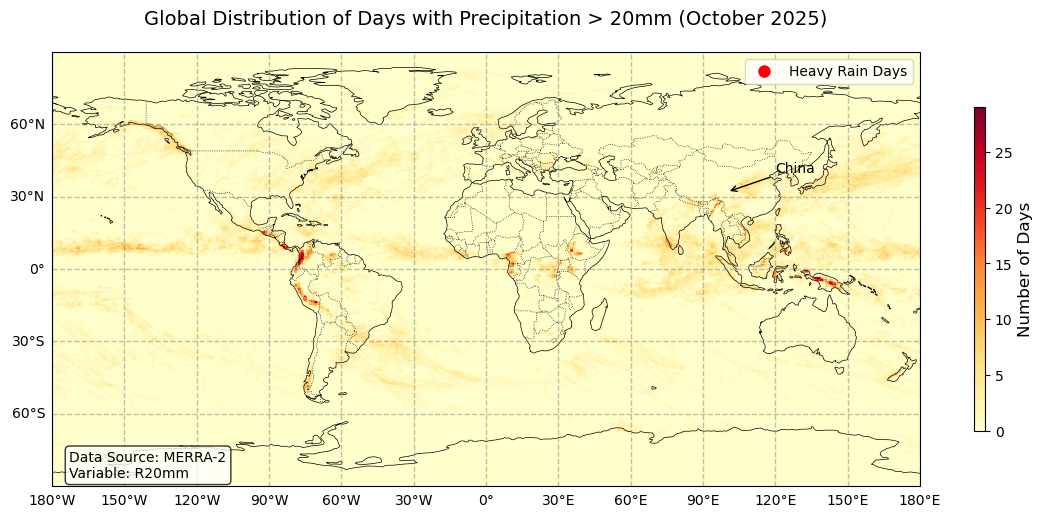

In [30]:
#提取变量：降水量大于20mm的天数 (R20mm)
heavy_rain_days = ds["R20mm"].squeeze()  # 移除单维度

# 创建图形
fig = plt.figure(figsize=(14, 7))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# 绘制数据
im = ax.pcolormesh(
    ds["lon"], 
    ds["lat"], 
    heavy_rain_days, 
    cmap="YlOrRd", 
    transform=ccrs.PlateCarree(),
    shading="auto"
)

# 添加地理特征
ax.add_feature(cfeature.LAND, facecolor="lightgray")
ax.add_feature(cfeature.OCEAN, facecolor="lightblue")
ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
ax.add_feature(cfeature.BORDERS, linestyle=":", linewidth=0.5)


# 设置网格线
gl = ax.gridlines(
    crs=ccrs.PlateCarree(), 
    draw_labels=True,
    linewidth=1, 
    color="gray", 
    alpha=0.5, 
    linestyle="--"
)
gl.top_labels = False
gl.right_labels = False
gl.xlocator = mticker.FixedLocator(np.arange(-180, 181, 30))
gl.ylocator = mticker.FixedLocator(np.arange(-90, 91, 30))
gl.xformatter = LONGITUDE_FORMATTER  
gl.yformatter = LATITUDE_FORMATTER  

# 设置标题和标签
plt.title("Global Distribution of Days with Precipitation > 20mm (October 2025)", fontsize=14, pad=20)

# 添加颜色条
cbar = plt.colorbar(im, ax=ax, orientation="vertical", pad=0.05, shrink=0.6, aspect=30)
cbar.set_label("Number of Days", fontsize=12)

# 添加文本框
ax.annotate(
    "Data Source: MERRA-2\nVariable: R20mm",
    xy=(0.02, 0.02), 
    xycoords="axes fraction",
    fontsize=10, 
    bbox=dict(boxstyle="round", facecolor="white", alpha=0.8)
)

# 注释
ax.annotate("China", 
            xy=(100, 32),   
            xytext=(120, 40), 
            arrowprops=dict(arrowstyle="->", color="black"),
            fontsize=10,
            transform=ccrs.PlateCarree())  

#设置图例
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Heavy Rain Days',
                          markerfacecolor='red', markersize=10)]
ax.legend(handles=legend_elements, loc='upper right')

# 设置地图范围（全球）
ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())

# 保存图形
plt.show()

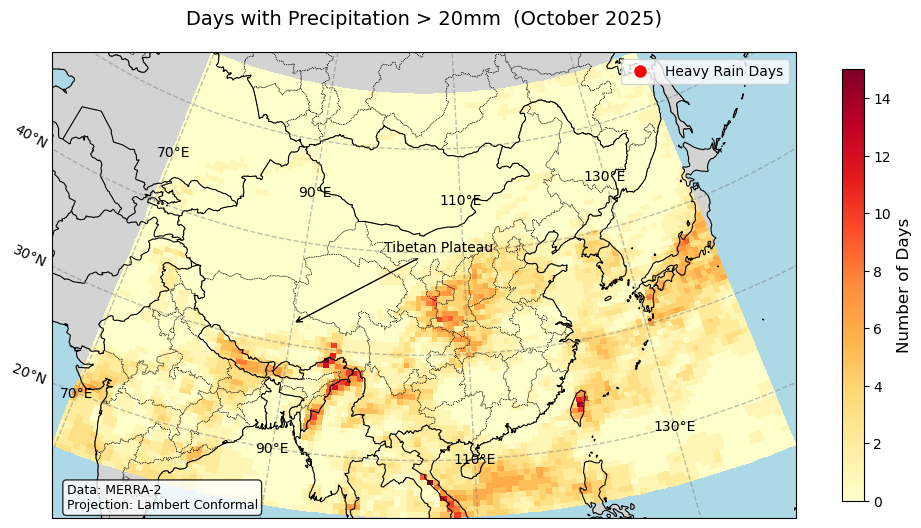

In [24]:
#2.2 [10 points] Make a regional map of the same variable. Your figure should contain: a different project, x label and ticks, y label and ticks, title, gridlines, legend, colorbar, masks or features, annotations, and text box (1 point each).

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from matplotlib.lines import Line2D

# 提取变量并筛选区域（70°E-140°E, 15°N-55°N）
heavy_rain_days = ds["R20mm"].sel(lon=slice(70, 140), lat=slice(15, 55)).squeeze()

# 创建图形、投影
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.LambertConformal(central_longitude=105))  

# 绘制数据
im = ax.pcolormesh(
    heavy_rain_days.lon, 
    heavy_rain_days.lat, 
    heavy_rain_days, 
    cmap="YlOrRd", 
    transform=ccrs.PlateCarree(),  
    shading="auto"
)

# 添加地理特征
ax.add_feature(cfeature.LAND, facecolor="lightgray")
ax.add_feature(cfeature.OCEAN, facecolor="lightblue")
ax.add_feature(cfeature.COASTLINE, linewidth=0.8)
ax.add_feature(cfeature.BORDERS, linestyle="-", linewidth=0.8)  
ax.add_feature(cfeature.STATES, linestyle=":", linewidth=0.5)  

# 设置坐标轴标签和刻度
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xlocator = mticker.FixedLocator([70, 90, 110, 130])  # 设置经度刻度
gl.ylocator = mticker.FixedLocator([20, 30, 40, 50])   # 设置纬度刻度
gl.top_labels = False
gl.right_labels = False

# 标题
plt.title("Days with Precipitation > 20mm  (October 2025)", fontsize=14, pad=20)

# 色条
cbar = plt.colorbar(im, ax=ax, orientation="vertical", pad=0.05, shrink=0.7)
cbar.set_label("Number of Days", fontsize=12)

# 图例
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Heavy Rain Days',
           markerfacecolor='red', markersize=10)
]
ax.legend(handles=legend_elements, loc='upper right', fontsize=10)

# 注释
ax.annotate("Tibetan Plateau", 
            xy=(90, 32),   
            xytext=(100, 40), 
            arrowprops=dict(arrowstyle="->", color="black"),
            fontsize=10,
            transform=ccrs.PlateCarree())  
#文本框
ax.text(0.02, 0.02, "Data: MERRA-2\nProjection: Lambert Conformal", 
        transform=ax.transAxes, bbox=dict(boxstyle="round", facecolor="white", alpha=0.8), fontsize=9)

plt.show()